# Exercício 3
## Dados desbalanceados
### Grupo: 
### Alunos:

- Nome 1 (N USP)
- 
-
---

No dataset que será utilizado nesse exercício, cada elemento representa uma transação com cartões de crédito. 

A base possui 30 atributos. `Time` representa o tempo em segundos desde a primeira transação da base. `Amount` corresponde ao valor da transação.

Outros 28 atributos numéricos anonimizados também são fornecidos, com 1 variável (`Class`) de saída onde 1 significa fraude e 0 transação normal.

**Esse exerício possui material complementar ("Undersampling e Oversampling")**

### Questão 01.
Carregue o dataset `creditcard_sampled.csv` e mostre a distribuição das classes:

*   Via histograma
*   Exibindo o número de ocorrências de cada classe



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169526,119745.0,1.993972,-0.219347,-2.046189,0.405564,0.516149,-0.123584,-0.097123,0.058803,0.768655,...,0.072511,0.345639,-0.058488,0.079695,0.192111,0.713780,-0.074037,-0.052888,28.75,0
60458,49331.0,1.162141,0.249188,0.417301,1.387925,-0.091427,-0.164236,0.113784,-0.051953,0.193628,...,-0.093470,-0.004738,-0.071066,0.112501,0.684323,-0.315129,0.043765,0.017698,10.00,0
29998,35731.0,-1.065322,2.226113,1.031873,2.765116,0.447476,0.555779,-0.605831,-2.384328,-2.056265,...,-1.466784,-0.198682,-0.160174,-0.168171,0.040714,0.127506,0.294972,0.205159,1.00,0
205756,135904.0,1.818818,-0.835903,-0.482267,0.093704,-0.745343,0.041284,-0.765761,0.204703,1.390716,...,0.259404,0.717498,0.113169,0.782528,-0.246793,0.065097,-0.012741,-0.034304,79.95,0


0    10000
1      492
Name: Class, dtype: int64

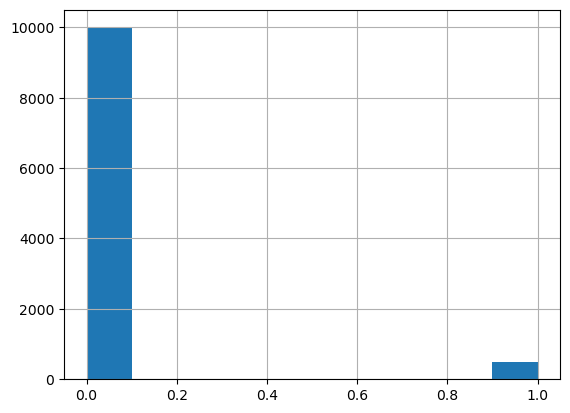

In [1]:
# 1.1. Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 1.2. Loading dataset
df = pd.read_csv('creditcard_sampled.csv', index_col=0)

# 1.3. Showing dataframe for visual confirmation
display(df)

# 1.4. Showing Class dataframe histogram
df['Class'].hist()

# 1.5. Counting occurrences per class
df['Class'].value_counts()
# from google.colab import drive
# drive.mount('/content/gdrive')



---

### Questão 02.

Separe o conjunto de dados em variáveis de entrada e variável alvo.

In [2]:
# 2.1. Defining the input and target parameters
input_features = df.columns.to_list()
target = input_features.pop(-1)

# 2.2. Creating the subsets
df_input = df[input_features]
df_target = df[target]
#print(max(df_input.index.values))
#print(max(df_target.index.values))



---

### Questão 03.

Crie uma função que aplique a técnica de subamostragem aleatória nesse conjunto de dados. 
- Sua função deve receber como entrada a base normalizada e as classes.

- Sua função e deve retornar um novo conjunto onde todas as classes devem ter o número de ocorrências da classe com **menor representatividade no conjunto de dados inicial** e um array com as respectivas labels.
- Mostre o resultado plotando um histograma da distribuição resultante classes 

1    492
0    492
Name: Class, dtype: int64

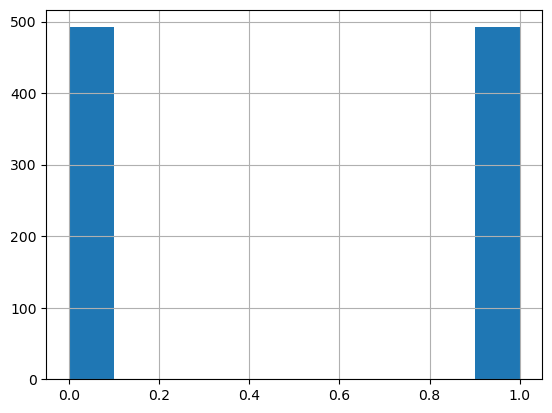

In [3]:
# Function to undersample the dataset
# Receives the data and targets
# Gets the number of data rows available for each class
# For each class randomly sample the number of rows related to class with fewer rows available
def undersample(inputs, targets):
  classes_count = targets.value_counts()
  classes_values = targets.unique()
  undersampled_targets_class = []
  for vclass in classes_values:
    undersampled_targets_class.append(targets[targets==vclass].sample(n=min(classes_count), random_state=123))
                                      
  undersampled_targets = pd.concat(undersampled_targets_class)
  undersampled_data = pd.DataFrame(inputs.loc[undersampled_targets.index.values])
  
  return undersampled_data, undersampled_targets

# 3.1. Since the function expect as the input the dataset normalized, then we need to first normalize it
scaler = MinMaxScaler()
df_input_normalized = pd.DataFrame(scaler.fit_transform(df_input), columns=df_input.columns).set_index(df_input.index.values)

# 3.2. Calling the sampling function with the normalized base and targets (classes)
df_input_undersample, df_target_undersample = undersample(df_input_normalized, df_target)
# undersampled_data, undersampled_targets = undersample(inputs, targets)

# 1.4. Showing Class dataframe histogram
df_target_undersample.hist()

# 1.5. Counting occurrences per class
df_target_undersample.value_counts()



---

### Questão 04.

Crie uma função que aplique a técnica de superamostragem aleatória nesse conjunto de dados. 

- Sua função deve receber como entrada a base normalizada e as classes.

- Sua função deve receber como entrada a base original e retornar um novo conjunto de dados onde todas as classes devem ter o número de ocorrências da classe com **maior representatividade no conjunto de dados inicial** e um array com as respectivas labels.
- Mostre o resultado plotando um histograma da distribuição resultante classes 

1    10000
0    10000
Name: Class, dtype: int64

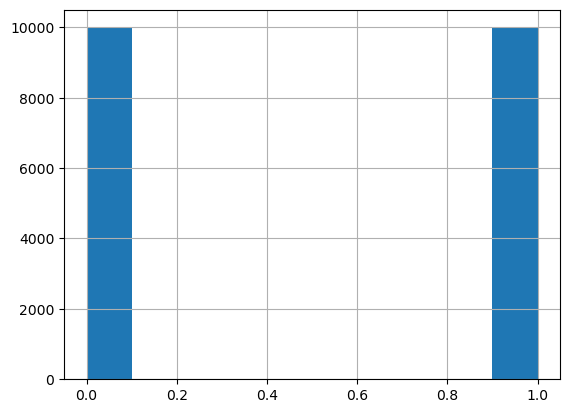

In [33]:
# Function to oversample the dataset
# Receives the data and targets
# Gets the number of data rows available for each class
# For each class randomly multiplicate the values to match the class with higher values
def oversample(inputs, targets):
  classes_count = targets.value_counts()  
  n_replications = int(np.floor(max(classes_count)/min(classes_count)))
  floating_point = (max(classes_count)/min(classes_count))%1
  range1 = int(np.ceil(min(classes_count)*floating_point))

  data = targets[targets==1] 
  replications_list = [n_replications+1 if _ < range1 else n_replications for _ in range(min(classes_count))]
  if sum(replications_list) > max(classes_count):
    replications_list[-1] = replications_list[-1] - 1
    
  replicated_data_targets = np.repeat(data, replications_list)
  
  replicated_data_targets = pd.concat([replicated_data_targets, targets[targets==0]])
  
  oversampled_targets = replicated_data_targets
  oversampled_data = pd.DataFrame(inputs.loc[oversampled_targets.index.values])
  
  return oversampled_data, oversampled_targets

# 4.1. Calling the sampling function with the normalized base and targets (classes)
df_input_oversample, df_target_oversample = oversample(df_input_normalized, df_target)

# 4.2. Showing Class dataframe histogram
df_target_oversample.hist()

# 4.3. Counting occurrences per class
df_target_oversample.value_counts()

---

### Questão 05.

Crie uma função que utilize técnicas de subamostragem e superamostragem nesse conjunto de dados para balancear o número de exemplos de cada classe.

- Sua função deve receber como entrada a base normalizada e as classes.
- Sua função deve receber como entrada a base original e retornar uma nova base onde todas as classes devem ter o número de ocorrências **igual à $\frac{tamanho\_dataset}{3}$** e um array com as respectivas labels.
- Mostre o resultado plotando um histograma da distribuição resultante classes 

0    3497
1    3497
Name: Class, dtype: int64

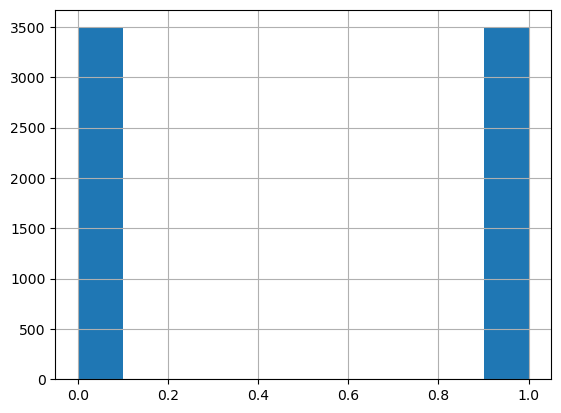

In [34]:
def dataset_sample(inputs, targets):
  dataset_size = len(targets)

  # Since we have about 492 for 1 and 10000 for 0, and each class should have sample size
  # It requires to call both functions: 
  #   oversample for targets == 1 and 
  #   undersample for targets == 0

  # From undersample got 340 values (170 of each class)
  sample_size = int(dataset_size/3)
  df_target_sample = df_target.sample(n=sample_size, random_state=123)
  df_input_normalized_sample = df_input_normalized.sample(n=sample_size, random_state=123)
  df_input_undersample, df_target_undersample = undersample(df_input_normalized_sample, df_target_sample)

  df_target_sample = df_target.sample(n=sample_size, random_state=123)
  df_input_normalized_sample = df_input_normalized.sample(n=sample_size, random_state=123)

  df_input_oversample, df_target_oversample = oversample(df_input_normalized_sample, df_target_sample)
  
  dataset_sampled_data = pd.concat([df_input_undersample, df_input_oversample])
  dataset_sampled_targets = pd.concat([df_target_undersample, df_target_oversample])
  return dataset_sampled_data, dataset_sampled_targets


# 5.1. Calling the sampling function with the normalized base and targets (classes)
df_input_sampled_data, df_target_sampled_targets = dataset_sample(df_input_normalized, df_target)

# 5.2. Showing Class dataframe histogram
df_target_sampled_targets.hist()

# 5.3. Counting occurrences per class
df_target_sampled_targets.value_counts()

### Questão 06.

Implemente o algoritmo SMOTE e aplique-o na base de forma que a classe minoritaria cresça em 300%.

Dicas:

- Considere aumentos a partir de 100% do conjunto (dobrar o número de exemplos)

- O algoritmo SMOTE executa as seguinte etapas (Adaptado do artigo: https://arxiv.org/pdf/1106.1813.pdf):

  - Encontre os k vizinho mais próximo (distância euclidiana do vetor de atributos) de cada elemento da classe minoritaria
  - Para cada elemento E da classe minoritaria:
      - Escolha um dos k vizinhos de E, L aleatoriamente
      - Calcule a diferença D entre os atributos (L-E)
      - Calcule um número aleatório G entre 0 e 1
      - Novo elemento = E + D*G

- Dados dois numpy arrays x e y, a distância euclidiana pode ser calculada com `np.linalg.norm(x-y)`

Pseudo-código no artigo:

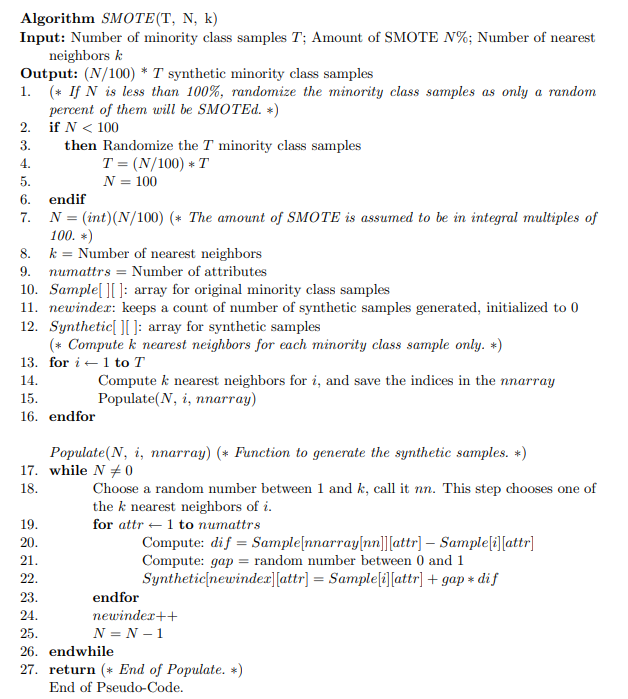

In [36]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.neighbors import NearestNeighbors

def nn(elem, data, k):
    nbrs = NearestNeighbors(n_neighbors=k + 1).fit(data)
    distances, indices = nbrs.kneighbors(elem.reshape(1, -1))
    k_proximos = indices[0][1:]
    return k_proximos

def populate(elem, vizinhos, k, num_sinteticos, data):
    novos_elementos = np.empty((0, elem.shape[0]))
    for _ in range(num_sinteticos):
        idx_vizinho = np.random.choice(vizinhos)
        vizinho = data[idx_vizinho]

        D = vizinho - elem
        G = np.random.rand()

        novo_elemento = elem + D * G
        novos_elementos = np.vstack((novos_elementos, novo_elemento))

    return novos_elementos

def smote(df, num_vizinhos=3, pct_novos_ex=300):
    targets = df["Class"]
    unique_classes, counts = np.unique(targets, return_counts=True)
    minority_class = unique_classes[np.argmin(counts)]
    minority_data = df[df["Class"] == minority_class].drop(columns=["Class"]).values

    num_sinteticos = int(minority_data.shape[0] * (pct_novos_ex / 100))

    novos_exemplos = np.empty((0, minority_data.shape[1]))

    for elem in minority_data:
        k_proximos = nn(elem, minority_data, num_vizinhos)
        novos_elementos = populate(elem, k_proximos, num_vizinhos, num_sinteticos // minority_data.shape[0], minority_data)
        novos_exemplos = np.vstack((novos_exemplos, novos_elementos))

    novos_exemplos_df = pd.DataFrame(novos_exemplos, columns=df.columns[:-1])
    novos_exemplos_df["Class"] = minority_class

    new_df = pd.concat([df, novos_exemplos_df])
    new_df = shuffle(new_df, random_state=42)

    return new_df

dat = df.drop(columns=['Time'])
new_data = smote(dat)


Original minority count: 492
New minority count: 1968


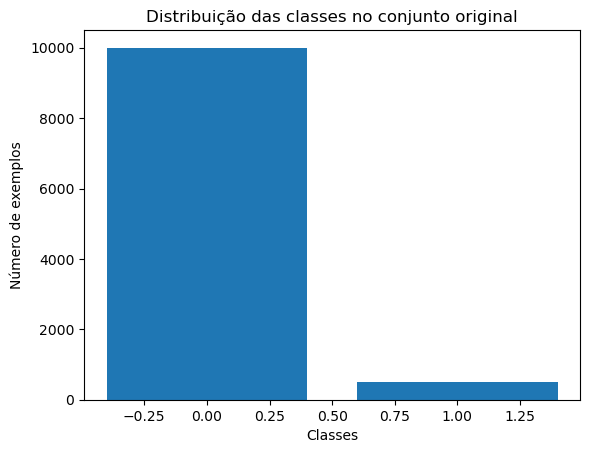

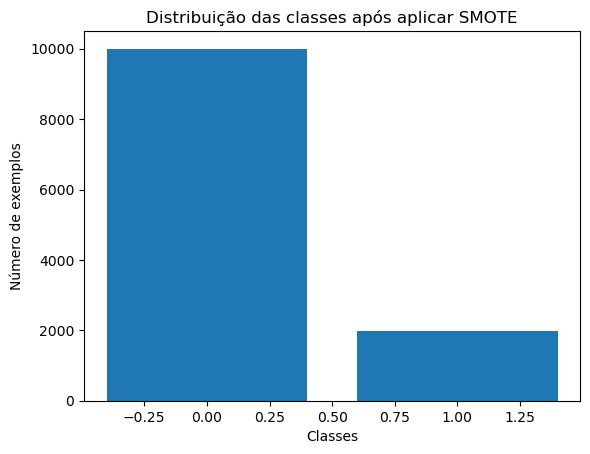

In [37]:
def plot_class_distribution(targets, title):
    unique_classes, counts = np.unique(targets, return_counts=True)
    plt.bar(unique_classes, counts)
    plt.xlabel("Classes")
    plt.ylabel("Número de exemplos")
    plt.title(title)
    plt.show()

original_targets = dat["Class"]
new_targets = new_data["Class"]


original_minority_count = np.min(np.unique(original_targets, return_counts=True)[1])
new_minority_count = np.min(np.unique(new_targets, return_counts=True)[1])
print(f"Original minority count: {original_minority_count}")
print(f"New minority count: {new_minority_count}")


plot_class_distribution(original_targets, "Distribuição das classes no conjunto original")
plot_class_distribution(new_targets, "Distribuição das classes após aplicar SMOTE")